In [1]:

import numpy as np
import pandas as pd
df = pd.read_csv('AAPL.csv',header=0, parse_dates=[0], index_col=0)

In [2]:
# Xem data 
df

,Price
Date,
2018-01-02,43.06
2018-01-03,43.06
2018-01-04,43.26
2018-01-05,43.75
2018-01-08,43.59
...,...
2023-12-04,189.43
2023-12-05,193.42
2023-12-06,192.32


In [3]:
# 1. Các thư viện cần thiết
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [4]:
# 2. Đọc file dữ liệu chứng khoán AAPL và chia train test validate theo tỉ lệ 9:1

df = df[['Price']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.9 * len(df))
test_size = int(0.1 * len(df))


train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]


In [5]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [6]:
# 4. Quá trình testing 
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(x_test)


In [7]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[194.39036566 194.5031339  194.61590214 194.72867038 194.84143862
 194.95420686 195.0669751  195.17974334 195.29251158 195.40527982
 195.51804806 195.6308163  195.74358454 195.85635278 195.96912102
 196.08188926 196.1946575  196.30742574 196.42019398 196.53296222
 196.64573046 196.7584987  196.87126694 196.98403518 197.09680342
 197.20957166 197.3223399  197.43510814 197.54787638 197.66064462]


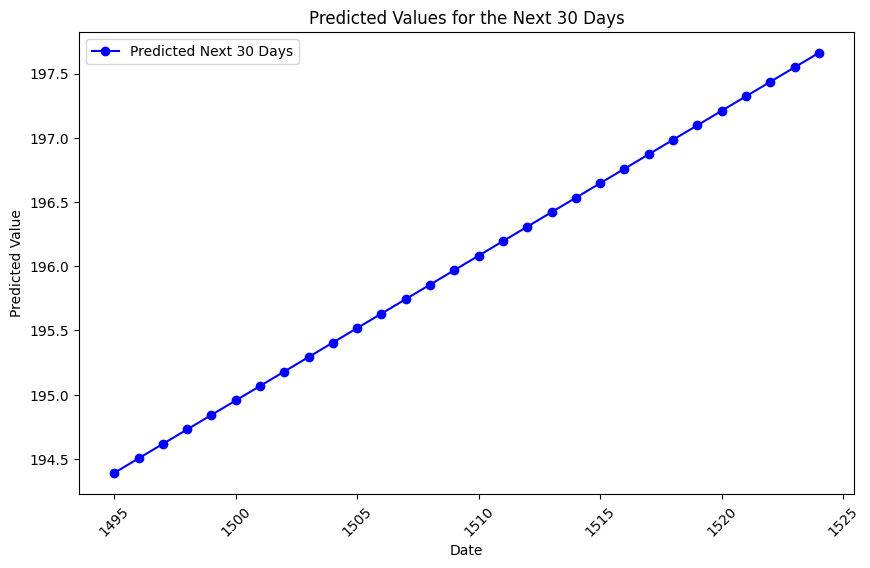

In [9]:

# Vẽ biểu đồ
plt.figure(figsize=(10, 6)) # Set the figure size
plt.plot(x_next_30_days, y_next_30_days, marker='o', color='b', label='Predicted Next 30 Days')

# Đặt tiêu đề và nhãn
plt.title('Predicted Values for the Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Predicted Value')
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.legend()

# Hiển thị biểu đồ
plt.show()

In [10]:
from sklearn.metrics import mean_absolute_percentage_error,mean_absolute_error
# 7. Đánh giá độ chính xác test bằng RMSE, MAE , MAPE
# RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)
# MAPE
test_mape = mean_absolute_percentage_error(y_test,y_pred)
print('Testing MAPE:', test_mape)
# MAE
test_mae = mean_absolute_error(y_test,y_pred)
print('Testing MAE:', test_mae)

Testing RMSE: 9.698513381847158
Testing MAPE: 0.04571228725824058
Testing MAE: 8.200780205174548


Testing RMSE: 9.698513381847158
Testing MAPE: 0.04571228725824058
Testing MAE: 8.200780205174548


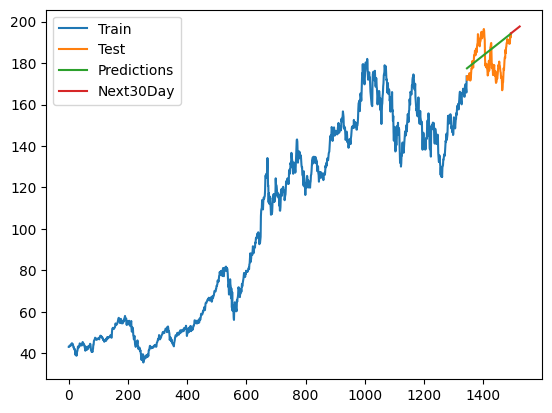

In [12]:
# 8. Tính RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)
# MAPE
test_mape = mean_absolute_percentage_error(y_test,y_pred)
print('Testing MAPE:', test_mape)
# MAE
test_mae = mean_absolute_error(y_test,y_pred)
print('Testing MAE:', test_mae)
# 9.Vẽ hình
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test','Predictions','Next30Day'])
plt.show()

In [13]:
test_data.index

RangeIndex(start=1345, stop=1494, step=1)